In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
# We want to see whole content (non-truncated)
pd.set_option('display.max_colwidth', None)

In [3]:
Kids_first= pd.read_csv(r'C:\Users\Ray\Desktop\kids first\text blob 2\kids first-600.csv',encoding='latin-1')

In [4]:
# Print the first five rows
display(Kids_first.head())

# Print the summary statistics
print(Kids_first.describe())

# Print the info
print(Kids_first.info())

,Text message
0,Doesn't g have class early tomorrow and thus shouldn't be trying to smoke at &lt;#&gt;
1,"Superb Thought- \Be grateful that u dont have everything u want. That means u still have an opportunity to be happier tomorrow than u are today.\"":-)"""
2,Hope you are having a good week. Just checking in
3,"I'm used to it. I just hope my agents don't drop me since i've only booked a few things this year. This whole me in boston, them in nyc was an experiment."
4,"Thursday night? Yeah, sure thing, we'll work it out then"


                  Text message
count                      599
unique                     590
top     Sorry, I'll call later
freq                         5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text message  599 non-null    object
dtypes: object(1)
memory usage: 4.8+ KB
None


In [5]:

# Drop duplicated rows
Kids_first.drop_duplicates(inplace=True)



In [6]:
# Print the info again

print(Kids_first.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 598
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text message  590 non-null    object
dtypes: object(1)
memory usage: 9.2+ KB
None


In [7]:
# Fill the missing values with unknown tag
Kids_first[ "Text message"].fillna("unknown", inplace=True)

# Print the unique text message and number of unique text
print("Unique Values:",Kids_first["Text message"].unique())
print("Unique Value count:",len(Kids_first["Text message"].unique()))

Unique Values: ["Doesn't g have class early tomorrow and thus shouldn't be trying to smoke at  &lt;#&gt;"
 'Superb Thought- \\Be grateful that u dont have everything u want. That means u still have an opportunity to be happier tomorrow than u are today.\\":-)"'
 'Hope you are having a good week. Just checking in'
 "I'm used to it. I just hope my agents don't drop me since i've only booked a few things this year. This whole me in boston, them in nyc was an experiment."
 "Thursday night? Yeah, sure thing, we'll work it out then"
 'Your free ringtone is waiting to be collected. Simply text the password \\MIX\\" to 85069 to verify. Get Usher and Britney. FML'
 'Probably money worries. Things are coming due and i have several outstanding invoices for work i did two and three months ago.'
 'How is it possible to teach you. And where.'
 'I wonder if your phone battery went dead ? I had to tell you, I love you babe'
 "Lovely smell on this bus and it ain't tobacco... "
 "We're all getting worri

In [8]:
import nltk
import sklearn
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ray\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ray\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ray\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ray\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 

In [11]:
def process_messages(message):
    
    # Remove links
    message = re.sub(r"http\S+|www\S+|https\S+!!" , '', message, flags=re.MULTILINE)
    
    # Remove mentions and hashtag
    message= re.sub(r'\@\w+|\#','',message)
    
    # Tokenize the words
    tokenized = word_tokenize(message)
     # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token, pos='a') for token in tokenized]

    # Remove non-alphabetic characters and keep the words contains three or more letters
    
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    
    return tokenized
    
# Call the function and store the result into a new column
Kids_first["Processed"] = Kids_first["Text message"].str.lower().apply(process_messages)

In [12]:
Kids_first.to_csv(r'C:\Users\Ray\Desktop\Kids_first_processed.csv')

In [13]:
Kids_first = pd.read_csv(r'C:\Users\Ray\Desktop\Kids_first_processed.csv')

In [14]:
# Print the first fifteen rows of Processed
display(Kids_first[["Processed"]].head(20))

,Processed
0,"['class', 'early', 'tomorrow', 'thus', 'trying', 'smoke']"
1,"['superb', 'grateful', 'dont', 'everything', 'want', 'means', 'still', 'opportunity', 'happy', 'tomorrow']"
2,"['hope', 'good', 'week', 'checking']"
3,"['used', 'hope', 'agents', 'drop', 'since', 'booked', 'things', 'year', 'whole', 'boston', 'nyc', 'experiment']"
4,"['thursday', 'night', 'yeah', 'sure', 'thing', 'work']"
5,"['free', 'ringtone', 'waiting', 'collected', 'simply', 'text', 'password', 'verify', 'get', 'usher', 'britney', 'fml']"
6,"['probably', 'money', 'worries', 'things', 'coming', 'due', 'several', 'outstanding', 'invoices', 'work', 'two', 'three', 'months', 'ago']"
7,"['possible', 'teach']"
8,"['wonder', 'phone', 'battery', 'went', 'dead', 'tell', 'love', 'babe']"
9,"['lovely', 'smell', 'bus', 'tobacco']"


In [15]:
# Import TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
# Create our contextual stop word
tfidf_stops = ["sorry","online", "class", "course", "learning", "learn","teach", "teaching", "distance","call","know","get","home","time","want","see"]
# Initialize a Tf-idf Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words= tfidf_stops)

# Fit and transform the vectorizer
tfidf_matrix = vectorizer.fit_transform(Kids_first["Processed"])
# Let's see what we have
display(tfidf_matrix)

# Create a DataFrame for tf-idf vectors and display the first five rows
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns= vectorizer.get_feature_names_out())
display(tfidf_df.head())

<590x1832 sparse matrix of type '<class 'numpy.float64'>'
	with 3875 stored elements in Compressed Sparse Row format>

,ability,able,abt,aburo,acc,access,accidentally,accommodation,account,accounts,...,yes,yesterday,yet,yetunde,yrs,yun,yunny,yup,zaher,zoe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from wordcloud import WordCloud


In [18]:
# Create a new DataFrame called frequencies
frequencies = pd.DataFrame(tfidf_matrix.sum(axis=0).T,index=vectorizer.get_feature_names_out(),columns=['total frequency'])

# Sort the words by frequency
frequencies.sort_values(by='total frequency',ascending=False, inplace=True)
# Display the most 20 frequent words
display(frequencies.head(20))

,total frequency
come,10.034829
lor,8.121924
send,7.684274
good,7.648430
got,7.437212
like,6.730881
late,6.587680
need,6.097061
today,6.023808
still,5.665922


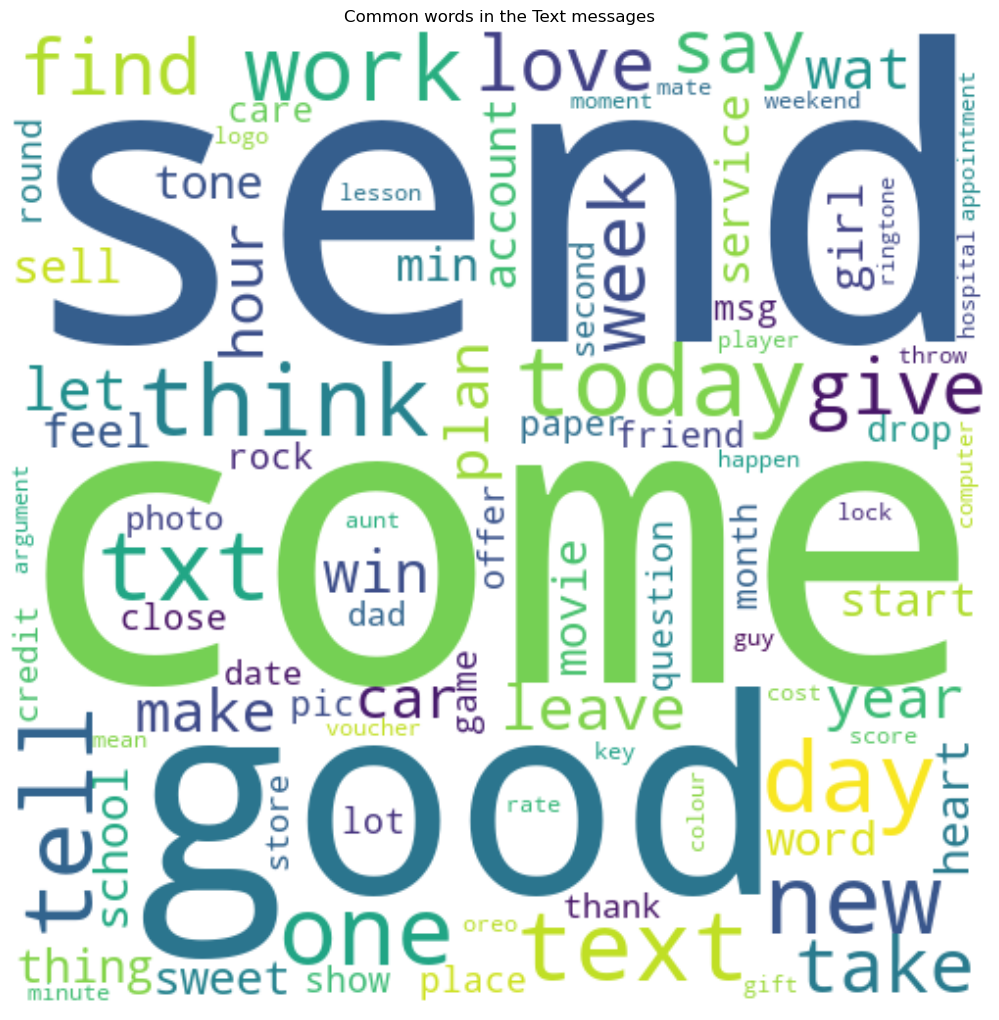

In [19]:
# Join the indexes
frequent_words = " ".join(frequencies.index)+" "

# Initialize the word cloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, max_words=2000, background_color ='white', stopwords= tfidf_stops)

# Generate the world clouds for each type of label
tweets_wc = wc.generate(frequent_words)
# Plot the world cloud                     
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(tweets_wc, interpolation="bilinear") 
plt.axis("off") 
plt.title("Common words in the Text messages")
plt.tight_layout(pad = 0) 
plt.show()

In [20]:
#  Sentiment Analysis

In [21]:
# Import the TextBlob
from textblob import TextBlob

In [22]:
# Add polarities and subkectivities into the DataFrame by using TextBlob
Kids_first["Polarity"] =Kids_first["Processed"].apply(lambda word: TextBlob(word).sentiment.polarity)
Kids_first["Subjectivity"] =Kids_first ["Processed"].apply(lambda word: TextBlob(word).sentiment.subjectivity)

In [23]:
# Display the Polarity and Subjectivity columns
display(Kids_first[["Polarity","Subjectivity"]].head(20))

,Polarity,Subjectivity
0,0.100000,0.300000
1,0.900000,1.000000
2,0.700000,0.600000
3,0.200000,0.400000
4,0.500000,0.888889
5,0.200000,0.578571
6,0.125000,0.416667
7,0.000000,1.000000
8,0.150000,0.500000
9,0.500000,0.750000


In [24]:
# Define a function to classify polarities
def analyse_polarity(polarity):
    if polarity > 0:
        return "positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"

In [25]:
# Apply the funtion on Polarity column and add the results into a new column
Kids_first["Label"] =Kids_first ["Polarity"].apply(analyse_polarity)

# Display the Polarity and Subjectivity Analysis
display(Kids_first[["Label"]].head(30))

,Label
0,positive
1,positive
2,positive
3,positive
4,positive
5,positive
6,positive
7,Neutral
8,positive
9,positive


In [26]:
# Print the value counts of the Label column
print(Kids_first["Label"].value_counts())

Neutral     268
positive    213
Negative    109
Name: Label, dtype: int64


In [27]:
Kids_first.to_csv(r'C:\Users\Ray\Desktop\Kids_first_processed.csv')


In [ ]:
training = [
('ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF IL DEFO TRY MY HARDEST 2 CUM 2MOROW LUV U MILLIONS LEKDOG','neg'),
('Its good, we''ll find a way','pos'),
('We''re getting worried over here, derek and taylor have already assumed the worst','neg'),
('Hello baby, did you get back to your mom''s ? Are you setting up the computer now ? Filling your belly ? How goes it loverboy ? I miss you already ... *sighs*','pos'),
('Lol I would but my mom would have a fit and tell the whole family how crazy and terrible I am!', 'neg'),
('NO GIFTS!! You trying to get me to throw myself off a cliff or something?','neg'),
('Good morning princess! How are you?','pos'),
]
testing = [
('Sorry, I''ll call later.','pos'),
('Horrible u eat macs eat until u forgot abt me already rite... U take so long 2 reply. I thk it''s more toot than b4 so b prepared. Now wat shall i eat?','neg'),
('Goodmorning, Today i am late for a min.','pos')
]

In [ ]:
from textblob import classifiers
classifier = classifiers.NaiveBayesClassifier(training)

In [ ]:
## decision tree classifier
dt_classifier = classifiers.DecisionTreeClassifier(training)

In [ ]:
print (classifier.accuracy(testing))
classifier.show_informative_features(9)

In [ ]:

TextBlob("not a very great calculation").sentiment

In [ ]:
TextBlob("dont pick my son without my permision, if you do i chubbe you").sentiment